In [11]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os

# Raw data file
source_file = ("../Resources/MovieData_clean.csv")
df = pd.read_csv(source_file)
df.head()

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,Awards,Poster,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions)
0,110681,Kings of the Evening,2008-01-01,0.0,98682.0,tt1006904,PG,99 min,Drama,Andrew P. Jones,...,8 wins & 1 nomination.,https://m.media-amazon.com/images/M/MV5BMjA3OT...,6.0,234,01 Nov 2010,Indican Pictures,Tuesday,January,2008,0.098682
1,26163,The Decline And Fall Of America,2008-01-01,7500.0,1200.0,tt1786696,NaN,120 min,Documentary,B.A. Brooks,...,NaN,https://m.media-amazon.com/images/M/MV5BMTMzNj...,5.2,13,NaN,NaN,Tuesday,January,2008,0.001200
2,13971,Wild Child,2008-01-01,20000000.0,21972336.0,tt1024255,PG-13,124 min,"Comedy, Drama, Romance",Nick Moore,...,NaN,https://m.media-amazon.com/images/M/MV5BNzUzYT...,6.1,"46,716",17 Nov 2009,Universal Pictures,Tuesday,January,2008,21.972336
3,6933,One Missed Call,2008-01-04,27.0,26.0,tt0479968,PG-13,87 min,"Horror, Mystery",Eric Valette,...,2 nominations.,https://m.media-amazon.com/images/M/MV5BMjA2NT...,4.0,"30,026",22 Apr 2008,Warner Bros. Pictures,Friday,January,2008,0.000026
4,14423,First Sunday,2008-01-11,0.0,38804615.0,tt0486578,PG-13,96 min,"Comedy, Crime, Drama",David E. Talbert,...,NaN,https://m.media-amazon.com/images/M/MV5BMjE4MT...,4.5,"9,203",13 May 2008,NaN,Friday,January,2008,38.804615


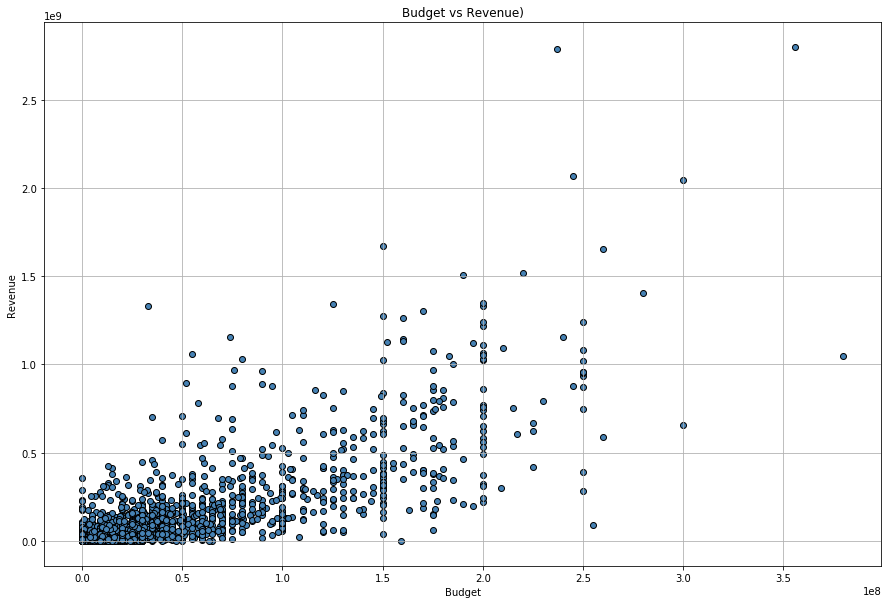

In [12]:
plt.figure(figsize=(15,10))
plt.scatter(df["Budget"], df["Revenue"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.title("Budget vs Revenue)")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

The correlation coefficient is: 0.7888986448950202


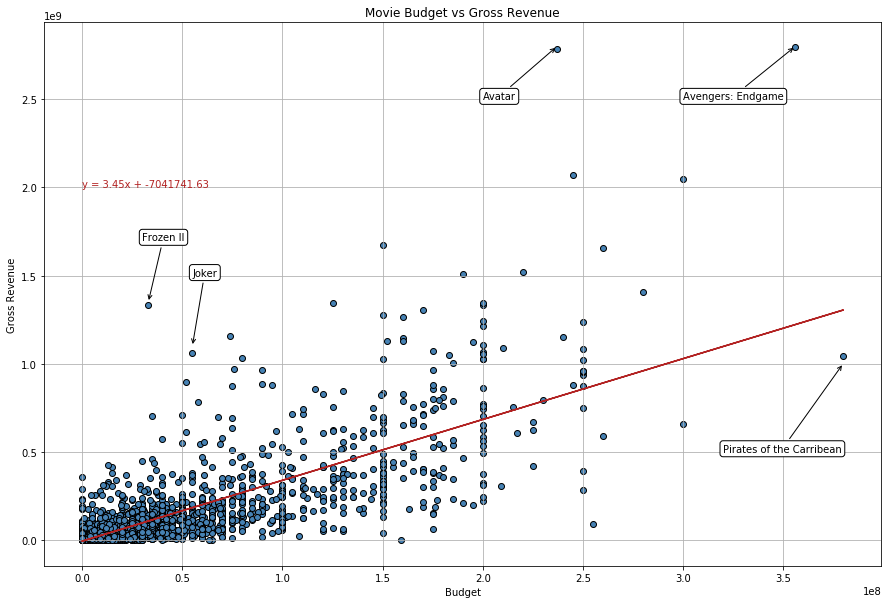

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(df["Budget"], df["Revenue"])
regress_values = df["Budget"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,10))
plt.scatter(df["Budget"], df["Revenue"], 
            marker="o", 
            facecolors="steelblue", 
            edgecolors="black"
           )
plt.plot(df["Budget"],
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(0, 2000000000),
             fontsize=10,
             color="firebrick"
            )
plt.annotate("Pirates of the Carribean",(380000000, 1000000000),
             xytext=(320000000, 500000000),
             fontsize=(10),
             color="black",
             bbox=dict(boxstyle="round", fc="w"),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
            )
plt.annotate("Avengers: Endgame",(356000000, 2800000000),
             xytext=(300000000, 2500000000),
             fontsize=(10),
             color="black",
             bbox=dict(boxstyle="round", fc="w"),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
            )
plt.annotate("Avatar",(237000000, 2800000000),
             xytext=(200000000, 2500000000),
             fontsize=(10),
             color="black",
             bbox=dict(boxstyle="round", fc="w"),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
            )
plt.annotate("Joker",(55000000, 1100000000),
             xytext=(55000000, 1500000000),
             fontsize=(10),
             color="black",
             bbox=dict(boxstyle="round", fc="w"),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
            )
plt.annotate("Frozen II",(33000000, 1350000000),
             xytext=(30000000, 1700000000),
             fontsize=(10),
             color="black",
             bbox=dict(boxstyle="round", fc="w"),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
            )
plt.title("Movie Budget vs Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()